# Project: Investigate TMDb movie data Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this notebook I'm going to analyze **`TMDb movie data Dataset`** to get some insights about popular genres over the years and top director, production companies and actors. Also I will do some anlysis to show the relationship between financial variables.

<ul>
<li><a href="#q1">1. Which genres are most popular?</a></li>
<li><a href="#q2">2. Which genres are most popular from year to year?</a></li>
<li><a href="#q3">3. Who are the Top 10 Directors according to movie revenue?</a></li>
<li><a href="#q4">4. Who are the Top 10 Production Companies according to number of produced films?</a></li>
<li><a href="#q5">5. Who are the Top 10 Actors having rules?</a></li>
<li><a href="#q6">6. Name the Top 10 Ranking movies sorted by average vote?</a></li>
<li><a href="#q7">7. Name the Top 10 Ranking movies sorted by vote counts?</a></li>
<li><a href="#q8">8. How many movies produced per month?</a></li>
<li><a href="#q9">9. Check the correlation between popularity and homepage</a></li>
<li><a href="#q10">10. Check the correlation between popularity and revenue</a></li>
<li><a href="#q11">11. Check the correlation between budget and revenue</a></li>
</ul>

In [1]:
#import required pacakges
import numpy as np
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
start_time = time.time()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [3]:
#load csv file into dataframe with pasing 'release_date' column so I can extract month from date
tmdb_movies = pd.read_csv('tmdb-movies.csv', parse_dates=['release_date'])

In [4]:
#extract month from 'release_date' column
tmdb_movies['release_month'] = tmdb_movies['release_date'].dt.month_name()

In [5]:
#show the first 2 rows of the dataset
tmdb_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May


In [6]:
#explore dataset diemension
tmdb_movies.shape

(10866, 22)

In [7]:
#print summary of dataset columns
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [8]:
#Generate descriptive statistics for numerical columns
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>It seems that about half of **`budget`** and **`revenue`** values are zeros and surely **`budget_adj`** and **`revenue_adj`** because they are in terms of them so I will drop zeros in cleaning section for more accurate financial analysis.

In [9]:
#Generate descriptive statistics for categorical columns
cat_cols = tmdb_movies.select_dtypes(include=['object'])
cat_cols.describe()

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_month
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,12
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,September
freq,2,4,6,4,45,5,134,13,712,156,1331


### Data Cleaning

>**1. Wave One**

>I will clean dataset by removing duplicates and missing values if exists and dropping columns I won't use in analysis.

In [10]:
#explore number of duplicated rows
tmdb_movies.duplicated().sum()

1

In [11]:
#drop duplicated rows
tmdb_movies = tmdb_movies.drop_duplicates()

In [12]:
#number of missing values in the dataset
tmdb_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
dtype: int64

In [13]:
#drop tagline, keywords and overview because I won't use them in my analysis
tmdb_movies.drop(['tagline', 'keywords', 'overview'], axis=1, inplace=True)

>**2. Wave Two**

> After analyis budget and revenue column, I found that many rows of these 2 columns contains zero which mean that is missing values so I decide to create new dataframe `tmdb_movies_fin` for analyising budget and revenue relation.

In [14]:
#select rows contains zero budget or zero revenue
zero_ind = tmdb_movies.query('budget == 0 or revenue == 0').index

In [15]:
#drop zero budget and revenue rows to create the new dataset
tmdb_movies_fin = tmdb_movies.drop(zero_ind, axis=0)

In [16]:
#show the first 2 rows of the dataset
tmdb_movies_fin.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May


In [17]:
#explore dataset diemension
tmdb_movies_fin.shape

(3854, 19)

<a id='eda'></a>
## Exploratory Data Analysis

> I've trimmed and cleaned your data, I'm ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.

#### functions to use in my analysis

- Function used to customize plot

In [18]:
def plot_cust(title, title_font, ylabel, xlabel, font_size):
    '''
    customize the plot with tilte and labels
    Input:
    ------
    figure_size: (tuple) (x,y) figure size
    title: (str) plot title
    title_font: (int) title font size
    ylabel: (str) y-axis label
    xlabel: (str) x-axis label
    font_size: (int) x and y label and ticks font size
    Return:
    -------
    no return
    '''
    plt.title(title, fontdict={'size': title_font})
    plt.ylabel(ylabel, fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.xlabel(xlabel, fontsize=font_size)
    plt.xticks(fontsize=font_size);

<a id='q1'></a>
### Research Question 1
Which genres are most popular?

In [19]:
genres_df = tmdb_movies.assign(genres=tmdb_movies['genres'].str.split('|')).explode('genres')

In [20]:
#show the first 5 rows of the dataset
genres_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May


In [21]:
#get dummies dataframe and dummies values for genres
pop_genres = genres_df.genres.value_counts().sort_values()

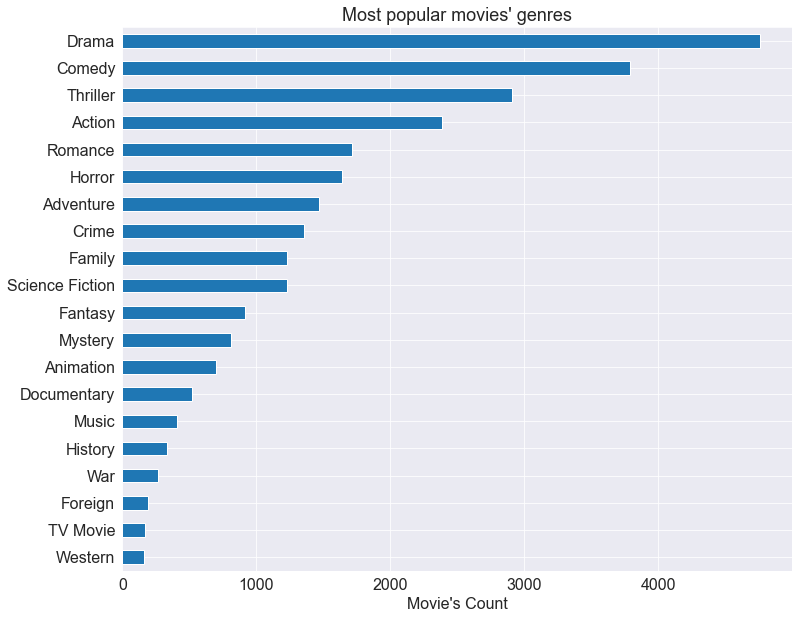

In [22]:
#'plot_cust' function attributtes to customize the plot
title = "Most popular movies' genres"
title_font = 18
ylabel = ''
xlabel = "Movie's Count"
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size)

#plot most popular movies' genres
pop_genres.plot(kind='barh', figsize=(12,10));

<a id='q2'></a>
### Research Question 2 
Which genres are most popular from year to year?

In [23]:
#new data frame contains 'release_year' and 'genres'
genres_by_years = genres_df.groupby(['release_year', 'genres']).size().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True).rename('count').reset_index()

In [24]:
genres_by_years.head()

,release_year,genres,count
0,1960,Drama,13
1,1961,Drama,16
2,1962,Drama,21
3,1963,Comedy,13
4,1964,Drama,20


>I use this [link](https://stackoverflow.com/a/58978499/18164513) to color `pop_count` variable according to `pop_genre` value.

In [25]:
result_cat = genres_by_years['genres'].astype('category')
result_codes = result_cat.cat.codes.values
cmap = plt.cm.Dark2(range(genres_by_years['genres'].unique().shape[0]))

patches = []
for code in result_cat.cat.codes.unique():
    cat = result_cat.cat.categories[code]
    patches.append(mpatches.Patch(color=cmap[code], label=cat))

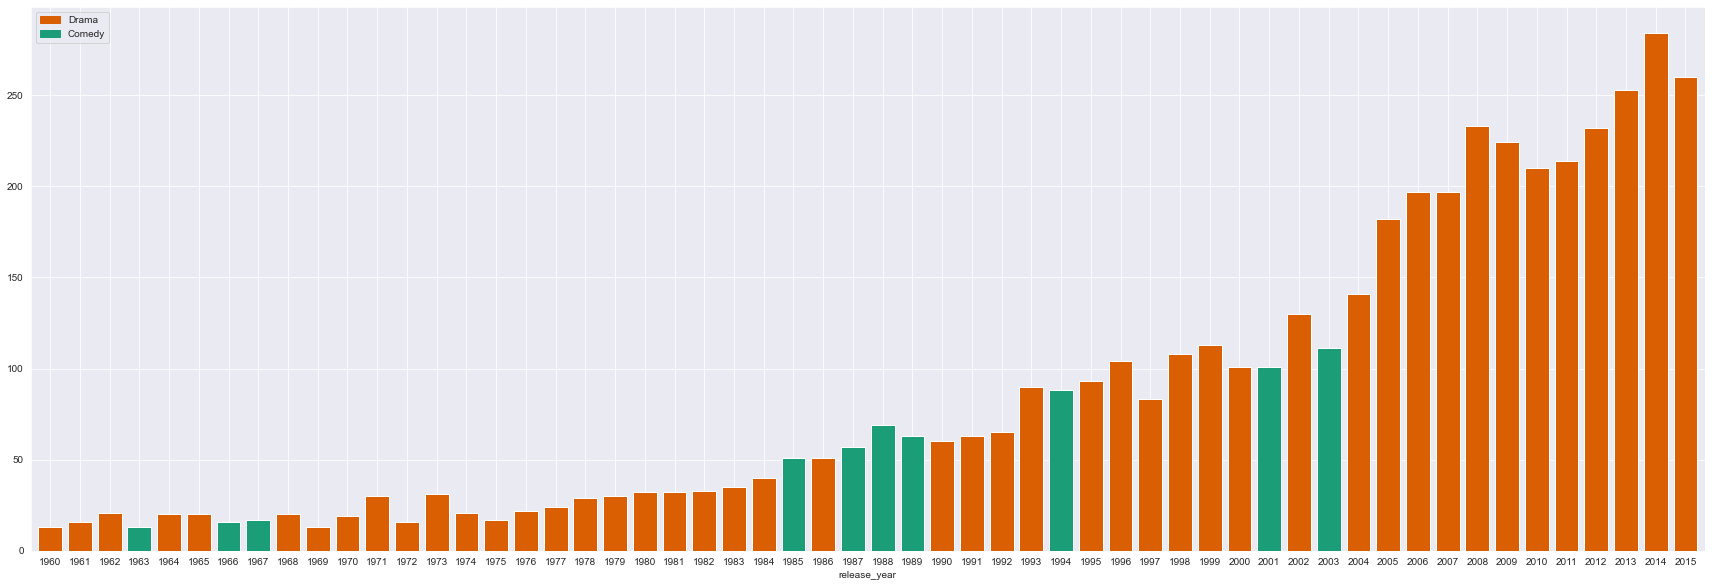

In [26]:
#plot most popular movies' genres
genres_by_years.plot.bar(x='release_year', y='count', color=cmap[result_codes], figsize=(30,10), rot=0, width=0.8)
plt.legend(handles=patches);

>Drama and Comedy movies are most popular along the time as shown in the figure above.

<a id='q3'></a>
### Research Question 3
Who are the Top 10 **`Directors`** according to movie **`revenue`**?

In [27]:
#group dataframe for 'director' and 'revenue' sum
director_df = tmdb_movies.assign(director=tmdb_movies['director'].str.split('|')).explode('director')

In [28]:
director_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April


In [29]:
top_10_dir = director_df.groupby('director')['revenue'].sum().sort_values()[-10:]

In [30]:
#show the top 10 directors
top_10_dir

director
Ridley Scott         3649996480
Tim Burton           3782609685
Chris Columbus       3851491668
Robert Zemeckis      3869690869
David Yates          4154295625
Christopher Nolan    4167548502
Michael Bay          4917208171
James Cameron        5841894863
Peter Jackson        6523244659
Steven Spielberg     9048014691
Name: revenue, dtype: int64

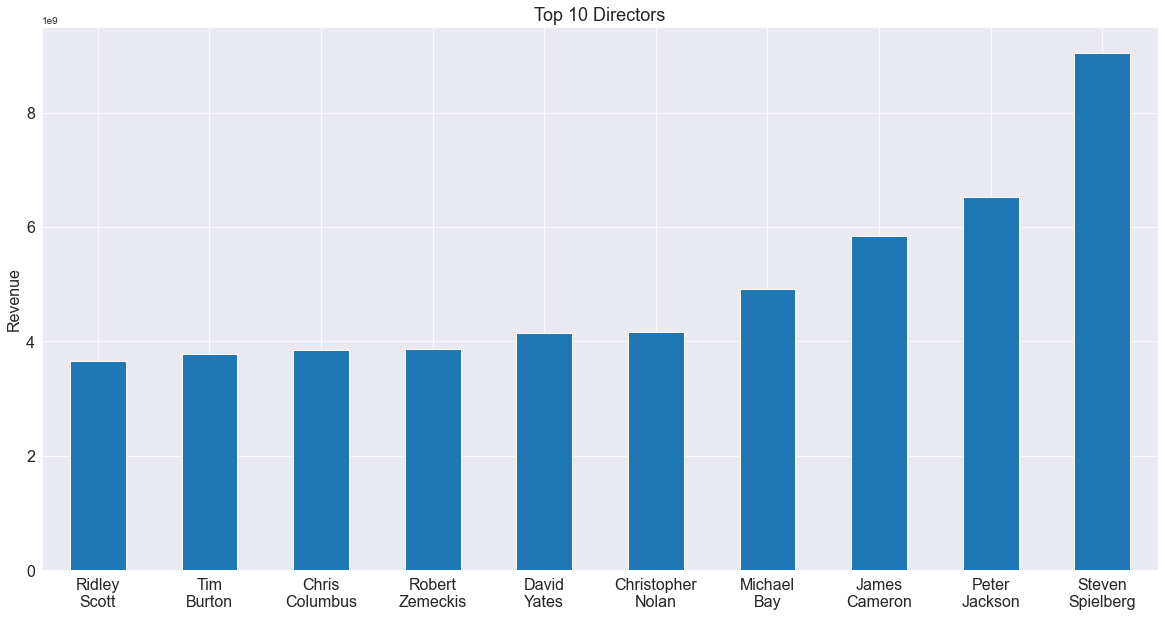

In [31]:
#plot top 10 directors
top_10_dir.plot(kind='bar', figsize=(20,10), rot=0)

#'plot_cust' function attributtes to customize the plot
title = 'Top 10 Directors'
title_font = 18
ylabel = 'Revenue'
xlabel = ''
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size)
pos, lab = plt.xticks()
plt.xticks(pos, [x.get_text().replace(' ', '\n') for x in lab]);

> As shown above, **`Steven Spielberg`** is the most profitable director.

<a id='q4'></a>
### Research Question 4
Who are the Top 10 **`Production Companies`** according to number of produced films?

In [32]:
#get dummies dataframe and dummies values for production companies
prod_co_df = tmdb_movies.assign(production_companies=tmdb_movies['production_companies'].str.split('|')).explode('production_companies')

In [33]:
prod_co_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June


In [34]:
#calculate top 10 production companies
top_10_prod_co = prod_co_df.groupby('production_companies')['id'].count().sort_values()[-10:]

In [35]:
#show the top 10 production companies
top_10_prod_co

production_companies
Columbia Pictures Corporation             160
Touchstone Pictures                       178
Walt Disney Pictures                      214
Metro-Goldwyn-Mayer (MGM)                 218
New Line Cinema                           219
Columbia Pictures                         272
Twentieth Century Fox Film Corporation    282
Paramount Pictures                        431
Warner Bros.                              509
Universal Pictures                        522
Name: id, dtype: int64

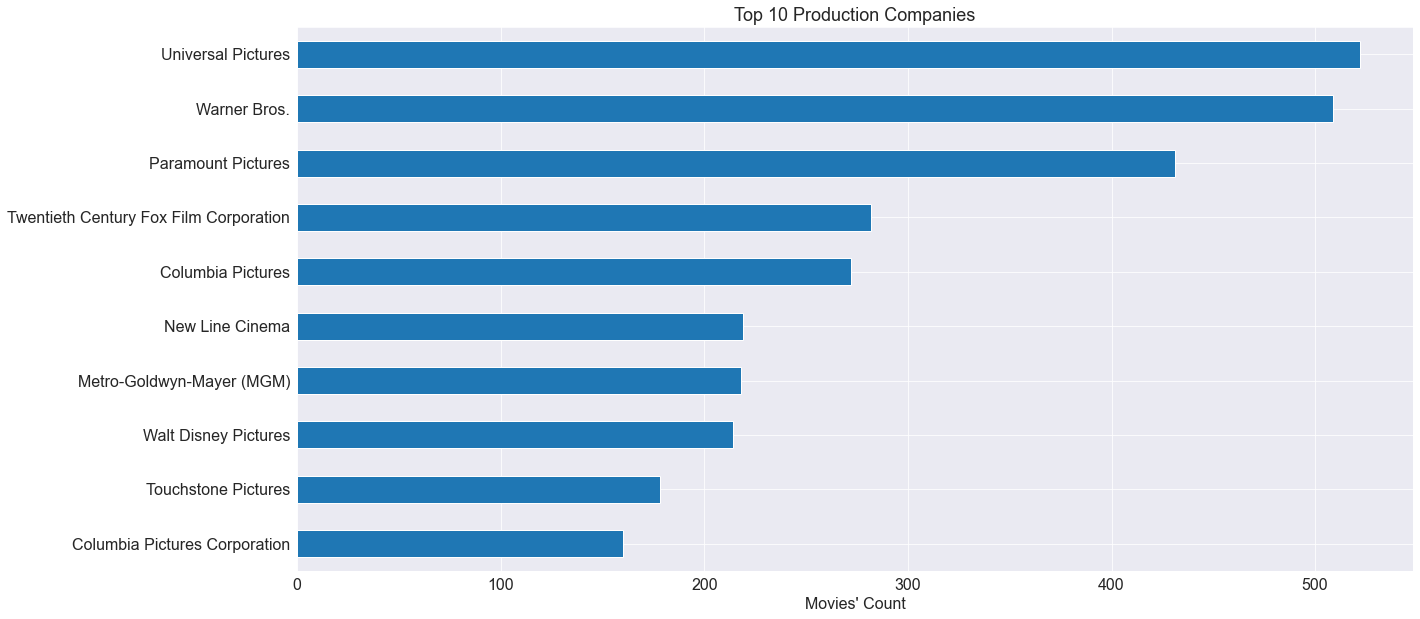

In [36]:
#plot top 10 production companies
top_10_prod_co.plot(kind='barh', figsize=(20,10))

#'plot_cust' function attributtes to customize the plot
title = 'Top 10 Production Companies'
title_font = 18
ylabel = ''
xlabel = "Movies' Count"
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size)

>It seems that **`Universal Pictures`** is at the top of production companies' list, producing **`522`** movies

<a id='q5'></a>
### Research Question 5
Who are the Top 10 **`Actors`** having rules?

In [37]:
#get dummies dataframe and dummies values for cast to get top actors
actors_df = tmdb_movies.assign(cast=tmdb_movies['cast'].str.split('|')).explode('cast')

In [38]:
#calculate top 10 actors
top_10_actors = actors_df.groupby('cast')['id'].count().sort_values()[-10:]

In [39]:
#show the top 10 actors
top_10_actors

cast
Susan Sarandon       48
Morgan Freeman       49
John Goodman         49
John Cusack          50
Robin Williams       51
Michael Caine        53
Nicolas Cage         61
Bruce Willis         62
Samuel L. Jackson    71
Robert De Niro       72
Name: id, dtype: int64

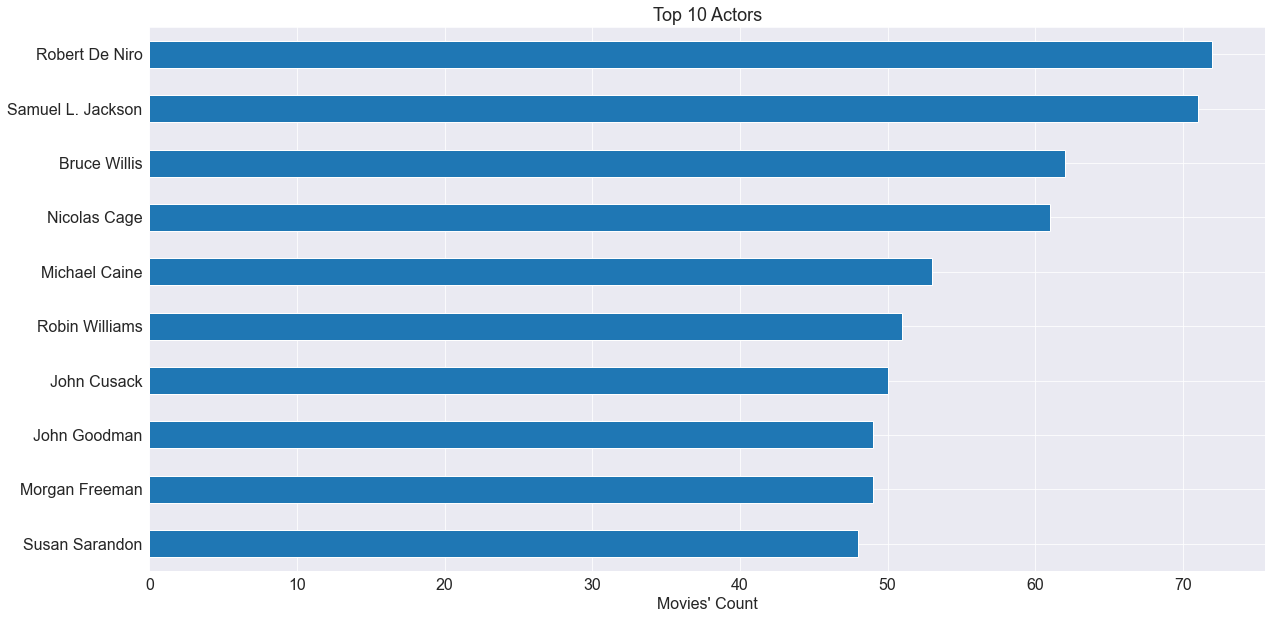

In [40]:
#plot top 10 actors
top_10_actors.plot(kind='barh', figsize=(20,10))

#'plot_cust' function attributtes to customize the plot
title = 'Top 10 Actors'
title_font = 18
ylabel = ''
xlabel = "Movies' Count"
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size)

>It seems that **`Robert De Niro`** is at the top of Actors' list, taking part in **`72`** movies

<a id='q6'></a>
### Research Question 6
Name the Top 10 Ranking movies sorted by average vote?

In [41]:
#calculate the top 10 ranking movies sorted by average vote
top_10_vote_avg = tmdb_movies.groupby('original_title')['vote_average'].max().sort_values()[-10:]

In [42]:
#show the top 10 ranking movies sorted by average vote
top_10_vote_avg

original_title
A Personal Journey with Martin Scorsese Through American Movies    8.5
The Art of Flight                                                  8.5
John Mayer: Where the Light Is Live in Los Angeles                 8.5
Dave Chappelle: Killin' Them Softly                                8.5
Opeth: In Live Concert At The Royal Albert Hall                    8.6
Pink Floyd: Pulse                                                  8.7
Life Cycles                                                        8.8
Black Mirror: White Christmas                                      8.8
The Mask You Live In                                               8.9
The Story of Film: An Odyssey                                      9.2
Name: vote_average, dtype: float64

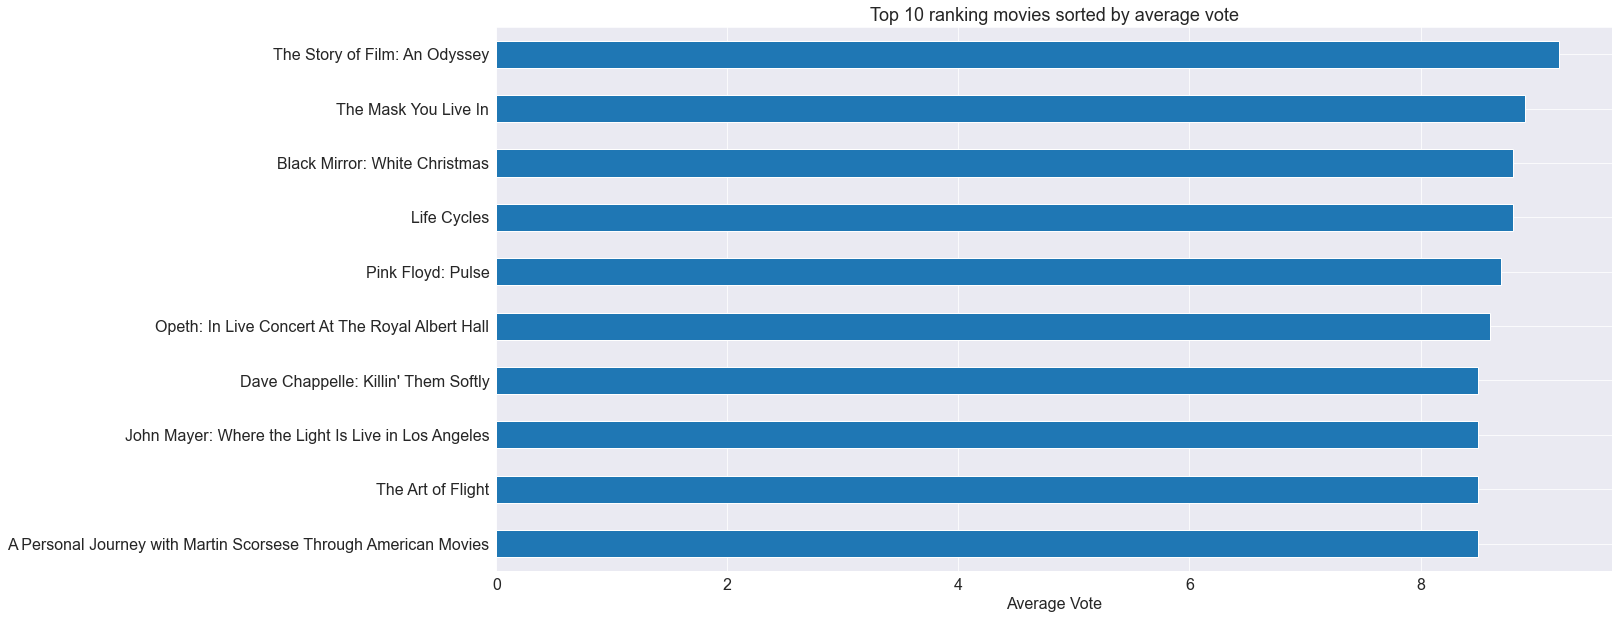

In [43]:
#plot the top 10 ranking movies sorted by average vote
top_10_vote_avg.plot(kind='barh', figsize=(20,10))

#'plot_cust' function attributtes to customize the plot
title = 'Top 10 ranking movies sorted by average vote'
title_font = 18
ylabel = ''
xlabel = 'Average Vote'
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size)

>It seems that **`The Story of Film: An Odyssey`** is at the top of Movies' list, scoring a rate of **`9.2`**.

<a id='q7'></a>
### Research Question 7
Name the Top 10 Ranking movies sorted by vote counts?

In [44]:
#calculate the top 10 ranking movies sorted by vote counts
top_10_vote_count = tmdb_movies.groupby('original_title')['vote_count'].max().sort_values()[-10:]

In [45]:
#show the top 10 ranking movies sorted by vote counts
top_10_vote_count

original_title
The Hobbit: An Unexpected Journey    6417
Interstellar                         6498
The Dark Knight Rises                6723
Iron Man 3                           6882
The Hunger Games                     7080
Django Unchained                     7375
The Dark Knight                      8432
Avatar                               8458
The Avengers                         8903
Inception                            9767
Name: vote_count, dtype: int64

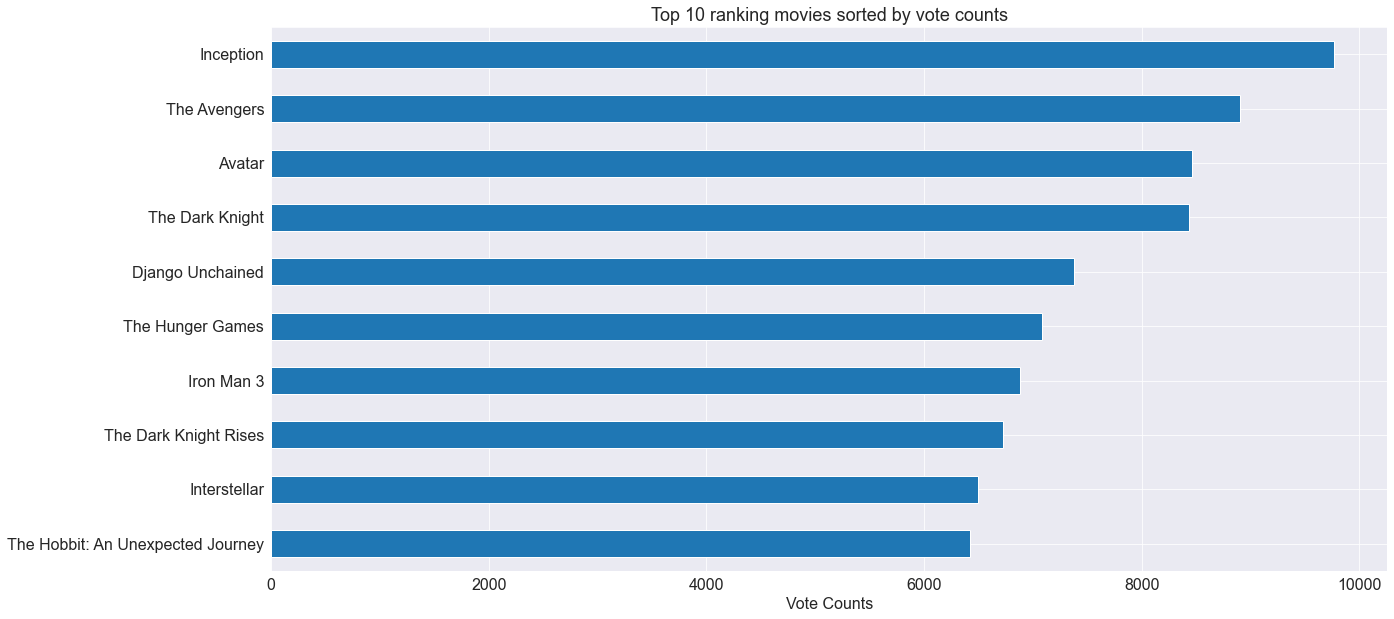

In [46]:
#plot the top 10 ranking movies sorted by average vote
top_10_vote_count.plot(kind='barh', figsize=(20,10))

#'plot_cust' function attributtes to customize the plot
title = 'Top 10 ranking movies sorted by vote counts'
title_font = 18
ylabel = ''
xlabel = 'Vote Counts'
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size)

>It seems that **`Inception`** is at the top of Movies' list, getting **`9767`** vote counts.

<a id='q8'></a>
### Research Question 8
What is the number of movies produced per month?

In [47]:
movies_by_month = tmdb_movies.groupby('release_month')['id'].count()
movies_by_month

release_month
April         797
August        918
December      985
February      691
January       919
July          799
June          827
March         822
May           809
November      814
October      1153
September    1331
Name: id, dtype: int64

In [48]:
#order the month 
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']

movies_by_month = movies_by_month.reindex(new_order, axis=0)

In [49]:
#show the data after reindexing
movies_by_month

release_month
January       919
February      691
March         822
April         797
May           809
June          827
July          799
August        918
September    1331
October      1153
November      814
December      985
Name: id, dtype: int64

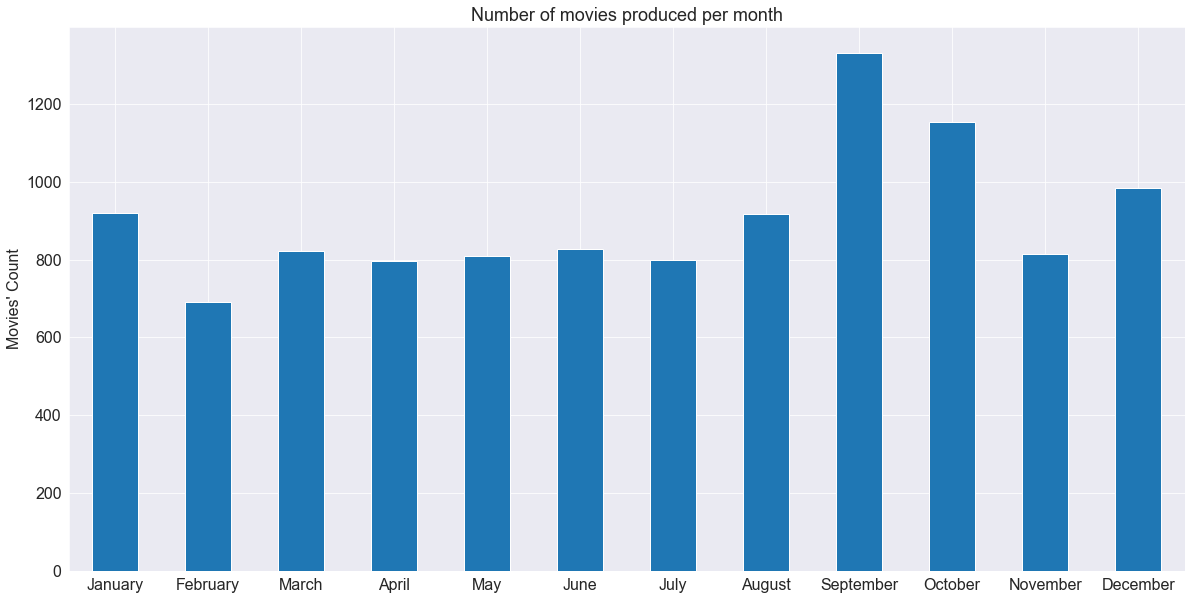

In [50]:
#plot the number of movies produced per month
movies_by_month.plot(kind='bar', figsize=(20,10), rot=0)

#'plot_cust' function attributtes to customize the plot
title = 'Number of movies produced per month'
title_font = 18
ylabel = "Movies' Count"
xlabel = ''
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size)

>As shown in the figure above, Most of prduced movies are in **`September`** and **`October`**.

<a id='q9'></a>
### Research Question 9
Check the correlation between `popularity` and `homepage`.

In [51]:
#create new column contain 1 if the movie has homepage and 0 if not.
tmdb_movies['has_homepage'] = np.where(tmdb_movies['homepage'].isnull(), 0, 1)

In [52]:
#check the correlation between 'popularity' and 'has_homepage' (the new column)
pop_hpg = tmdb_movies[['popularity', 'has_homepage']]
pop_hpg.corr()

,popularity,has_homepage
popularity,1.000000,0.214923
has_homepage,0.214923,1.000000


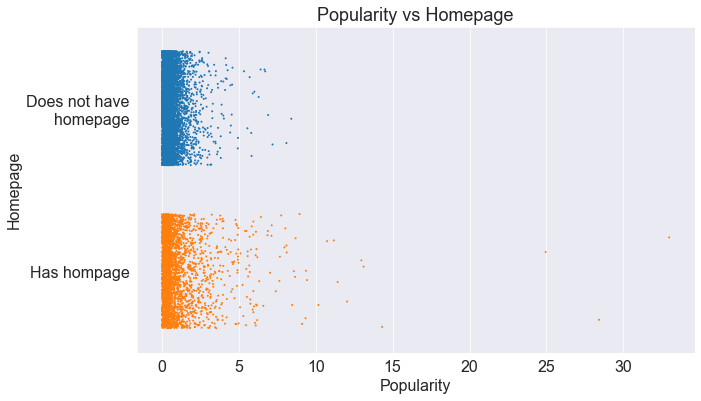

In [53]:
plt.figure(figsize=(10,6))
sns.stripplot(data=pop_hpg, x='popularity', y='has_homepage', orient='h', jitter=0.35, size=2)

#'plot_cust' function attributtes to customize the plot
title = 'Popularity vs Homepage'
title_font = 18
ylabel = "Homepage"
xlabel = 'Popularity'
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size)
plt.yticks([0, 1], ['Does not have\nhomepage', 'Has hompage']);

>It seems that there is a low positive relationship between `popularity` and `homepage`.

<a id='q10'></a>
### Research Question 10
Check the correlation between `popularity` and `revenue`.
> Here, I will use `tmdb_movies_fin` dataset for more accurate analysis

In [54]:
#check the correlation between 'popularity' and 'revenue'
pop_rev = tmdb_movies_fin[['popularity', 'revenue']]
pop_rev.corr()

,popularity,revenue
popularity,1.000000,0.615535
revenue,0.615535,1.000000


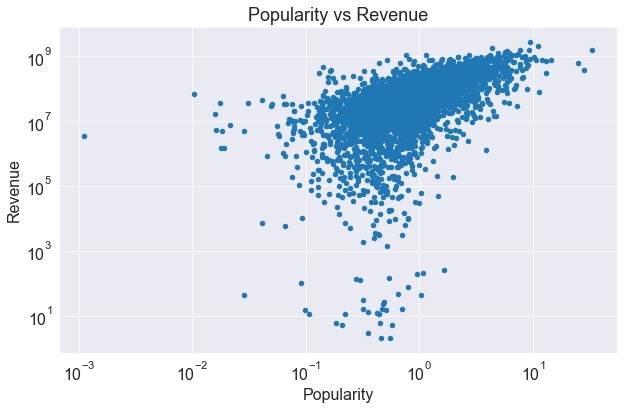

In [55]:
pop_rev.plot(kind='scatter', x='popularity', y='revenue', figsize=(10,6), logx=True, logy=True)

#'plot_cust' function attributtes to customize the plot
title = 'Popularity vs Revenue'
title_font = 18
ylabel = "Revenue"
xlabel = 'Popularity'
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size);

>It seems that there is a pretty strong positive correlation between **`popularity`** and **`revenue`**.

<a id='q11'></a>
### Research Question 11
Check the correlation between `budget` and `revenue`.
> Here, I will use `tmdb_movies_fin` dataset for more accurate analysis

In [56]:
#check the correlation between 'popularity' and 'revenue'
bud_rev = tmdb_movies_fin[['budget', 'revenue']]
bud_rev.corr()

,budget,revenue
budget,1.000000,0.688556
revenue,0.688556,1.000000


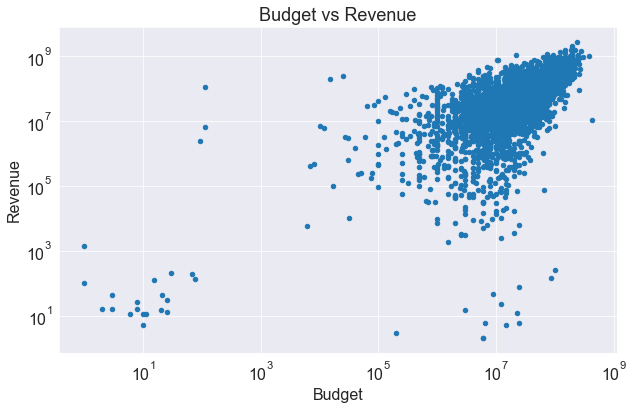

In [57]:
bud_rev.plot(kind='scatter', x='budget', y='revenue', figsize=(10,6), logx=True, logy=True)

#'plot_cust' function attributtes to customize the plot
title = 'Budget vs Revenue'
title_font = 18
ylabel = "Revenue"
xlabel = 'Budget'
font_size = 16
plot_cust(title, title_font, ylabel, xlabel, font_size);

>It seems that there is a pretty strong positive correlation between **`budget`** and **`revenue`**.

<a id='conclusions'></a>
## Conclusions

From the analysis above, we can conclude the insights in:
1. **`Drama`** and **`Comedy`** movies are most popular along the time.

2. **`Steven Spielberg`** is the most profitable director.

3. **`Universal Pictures`** is at the top of production companies' list, producing **`522`** movies.

4. **`Robert De Niro`** is at the top of Actors' list, taking part in **`72`** movies.

5. **`The Story of Film: An Odyssey`** is at the top of Movies' list, scoring a rate of **`9.2`**.

6. **`Inception`** is at the top of Movies' list, getting **`9767`** vote counts.

7. Most of prduced movies are in **`September`** and **`October`**.

8. There is a low positive relationship between **`popularity`** and **`homepage`**.

9. There is a pretty strong positive correlation between **`popularity`** and **`revenue`**.

10. There is a pretty strong positive correlation between **`budget`** and **`revenue`**.

### Limitations
- It is very inapplicable to reach  perfect clean accurate and complete data. So in my analysis, I split the cleaning process into 2 waves.
    - The first wave by removing duplicates and null values if exists. After this wave, the dataset size doesn't affect too much so it was very sufficient in finding insights about movies data.
    - The second wave was after finding that more than 50% of budget and revenue columns contains zeros which is accually a missing values so I decide to drop these rows to have an accurate analysis when finding insights related to budget and revenue. After this wave, the dataset shrink to third of the dataset which can be accepted in getting insights about financial terms.
    - So i think data provided in the dataset is sufficient to answer my questions and dropping zero budget and revenue columns doesn't affect accuracy of the analysis.

- We can decide if there is a correlation between variable by looking at scatter plots and we can calculate statistical hypothesis testing to find correlation coefficient (ex: The Pearson Coefficient)

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-TMDb_movie_data.ipynb'])

1

In [59]:
print("\nRunning this notebook took %s seconds." % (time.time() - start_time))


Running this notebook took 22.307525873184204 seconds.
